In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('tips.csv') 

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
for col in df.select_dtypes(include=['object']).columns:
    if df[col].nunique() <= 10:
        df = pd.get_dummies(df, columns=[col], drop_first=True)
    else:  
        df[col] = LabelEncoder().fit_transform(df[col])

scaler = StandardScaler()
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features] = scaler.fit_transform(df[numeric_features])


X = df.drop('tip', axis=1)
y = df['tip']

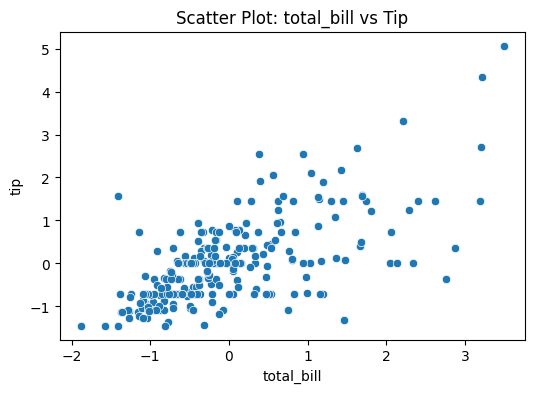

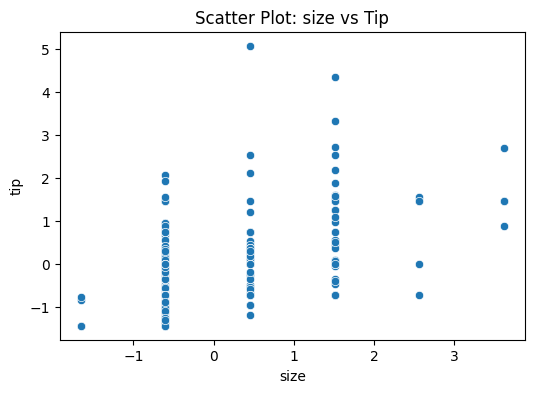

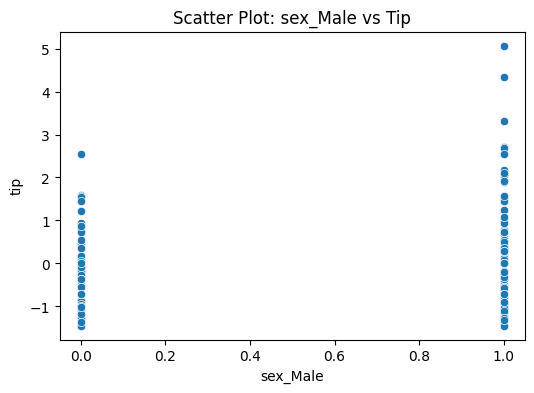

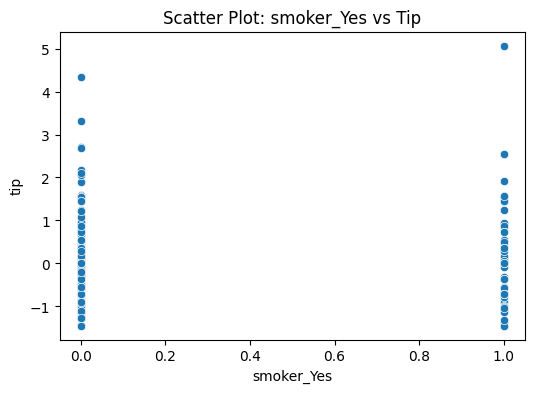

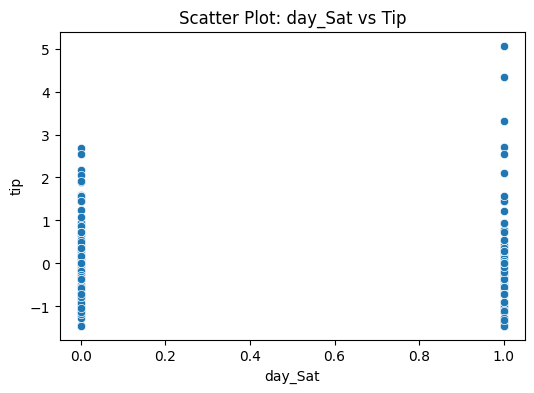

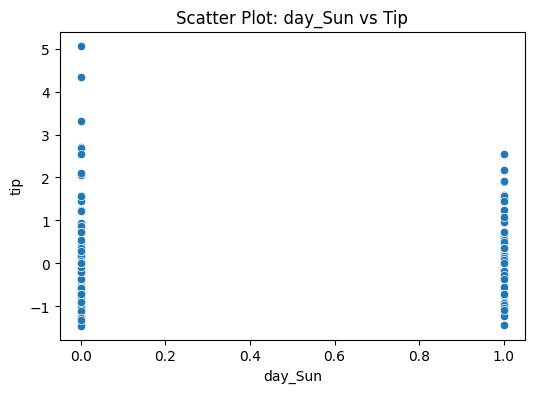

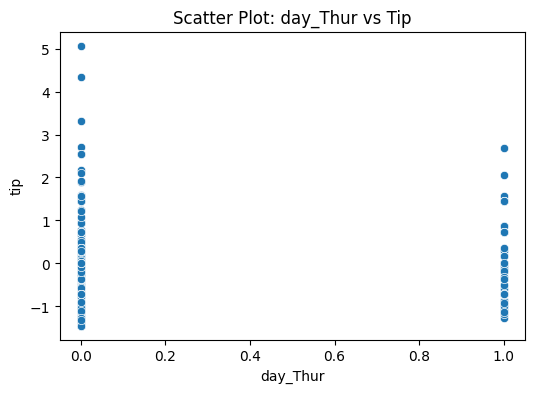

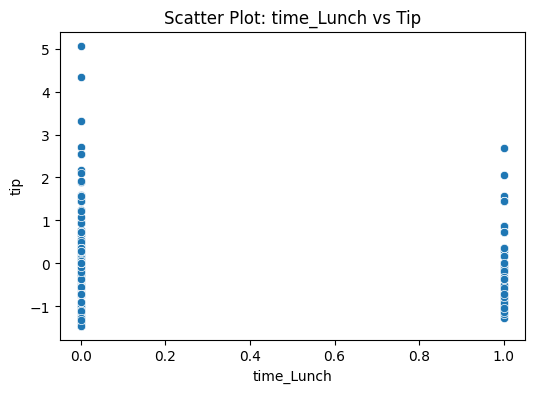

In [17]:
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=y)
    plt.title(f'Scatter Plot: {col} vs Tip')
    plt.show()

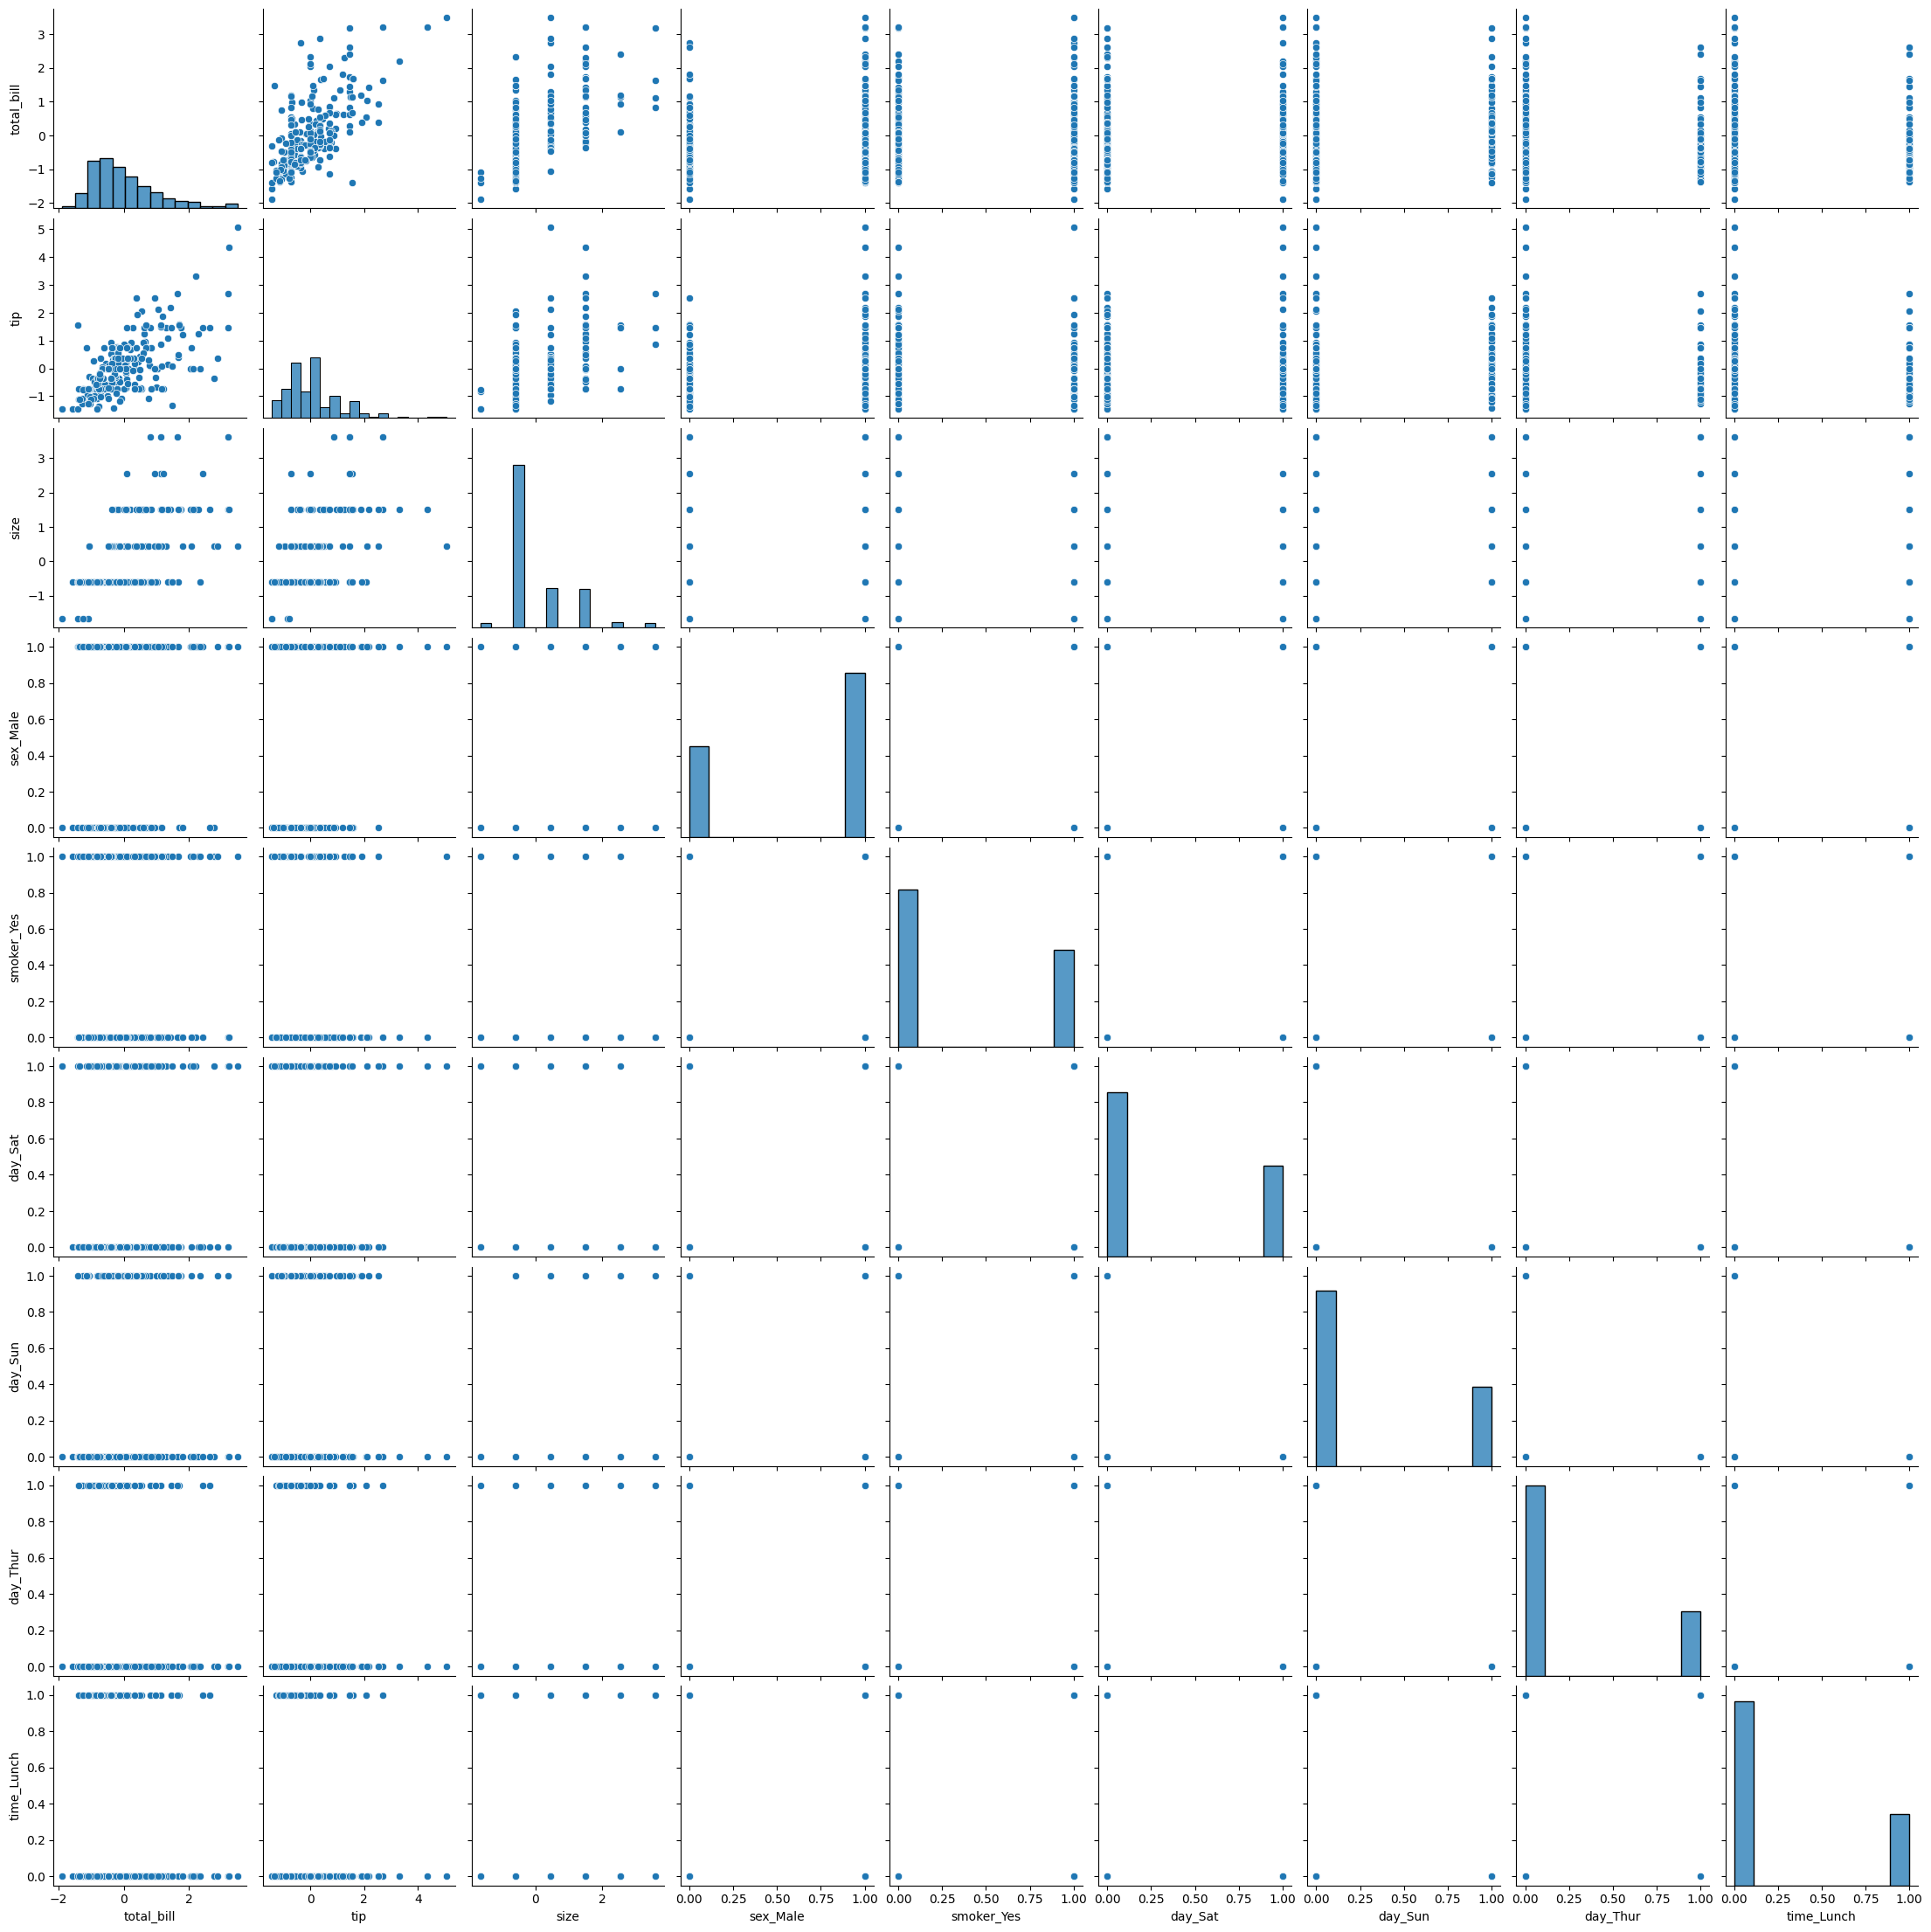

In [18]:
sns.pairplot(df)
plt.show()

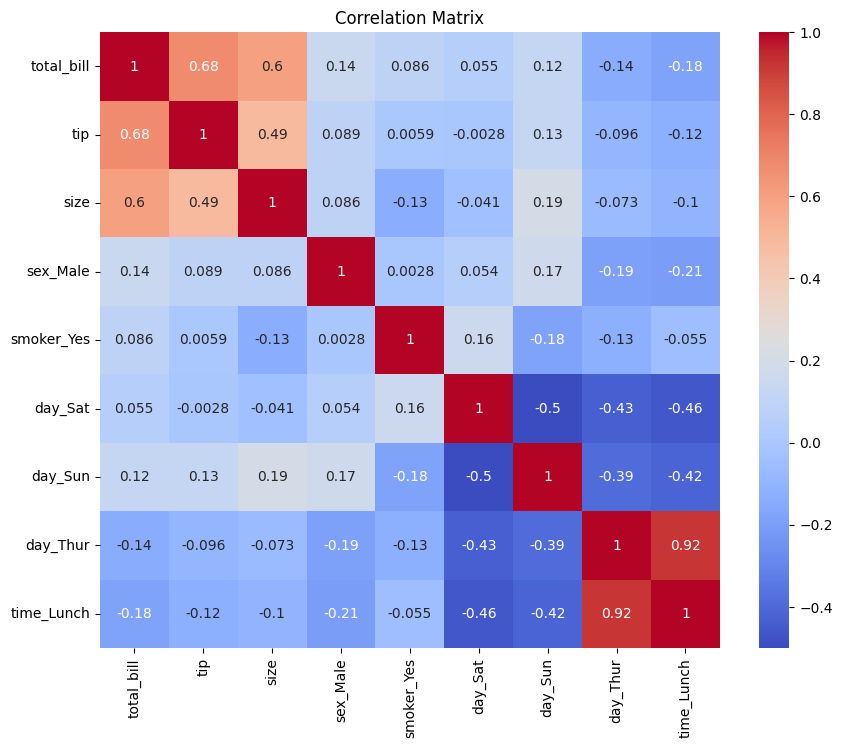

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [21]:
X = X.astype(float)
y = y.astype(float)

In [23]:
X_with_const = sm.add_constant(X)
rainbow_statistic, rainbow_p_value = linear_rainbow(sm.OLS(y, X_with_const).fit())
print(f"Rainbow Test p-value: {rainbow_p_value}")


Rainbow Test p-value: 0.16588383059241668


large p value denotes that the data is linear

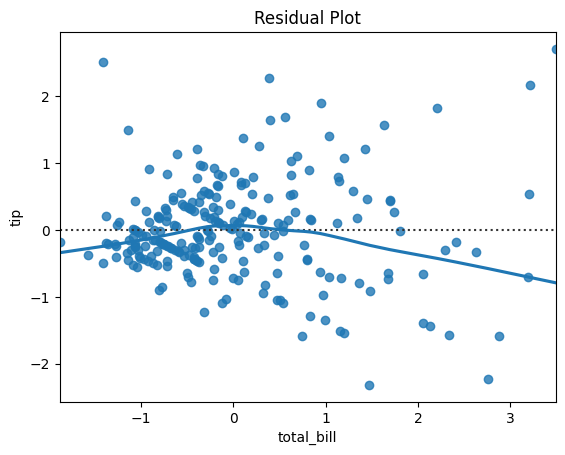

In [26]:
sns.residplot(x = "total_bill", y = "tip", data = df, lowess=True)
plt.title("Residual Plot")
plt.show()


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Performance:\nMAE: {mae}, RMSE: {rmse}, R2 Score: {r2}\n")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor()
]


In [27]:
for model in models:
    evaluate_model(model, X_train, X_test, y_train, y_test)



LinearRegression Performance:
MAE: 0.4831497467653271, RMSE: 0.6073751512403224, R2 Score: 0.43730181943482527

Ridge Performance:
MAE: 0.4829534662931501, RMSE: 0.6061977321213261, R2 Score: 0.43948132718620425

Lasso Performance:
MAE: 0.7583315244593878, RMSE: 0.8716731588976983, R2 Score: -0.15896098636013756

DecisionTreeRegressor Performance:
MAE: 0.601396430353304, RMSE: 0.803543555338355, R2 Score: 0.015126810737052576

RandomForestRegressor Performance:
MAE: 0.5475160988995568, RMSE: 0.6964035089682742, R2 Score: 0.26025272856234116

SVR Performance:
MAE: 0.46852161497611494, RMSE: 0.6119361045879892, R2 Score: 0.4288191667913209

KNeighborsRegressor Performance:
MAE: 0.5214073057263177, RMSE: 0.6628405211228627, R2 Score: 0.32983835164634523



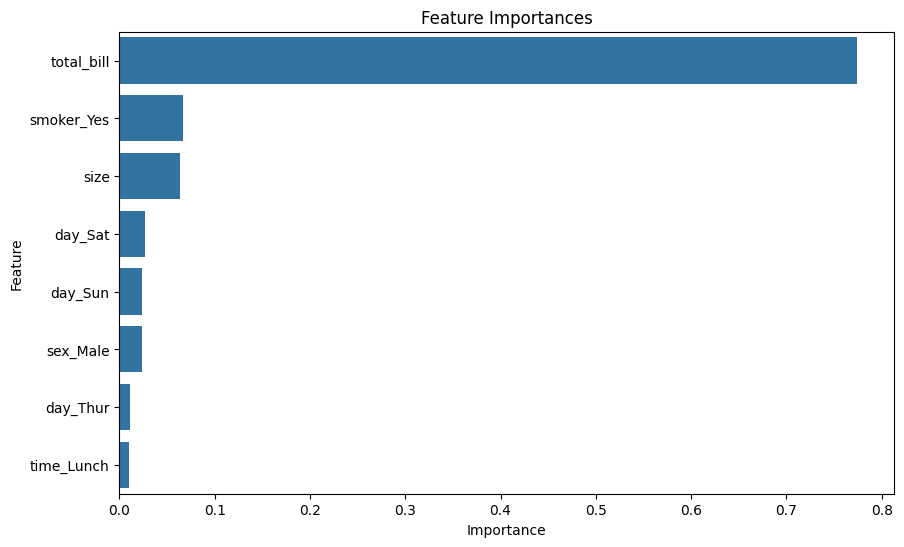

In [31]:
if hasattr(models[4], "feature_importances_"):  # RandomForestRegressor
    importances = models[4].feature_importances_
    feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
    feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
    plt.title("Feature Importances")
    plt.show()

In [30]:
feature_importance_df

,Feature,Importance
0,total_bill,0.774602
3,smoker_Yes,0.066873
1,size,0.063522
4,day_Sat,0.027016
5,day_Sun,0.023584
2,sex_Male,0.023335
6,day_Thur,0.011060
7,time_Lunch,0.010008


* Focus on Increasing Total Bill Amounts with Upselling
Since higher bills lead to better tips, train staff to gently suggest additional items to increase bill sizes. Offering popular choices, premium options, or seasonal dishes can help raise the total amount—and tips—as well, motivating staff and boosting earnings.

* Encourage Non-Smoking for Higher Tips
The data shows that non-smoking tables might lead to better tips. Promoting a smoke-free area or encouraging customers to dine in non-smoking sections could make the experience more pleasant for many and lead to higher tips, which can also improve staff morale.

* Adapt Service Based on Table Size
Tips seem to vary by table size, so consider customizing service for different group sizes. Larger groups might enjoy shared platters, while smaller tables may prefer personal recommendations. Tailoring the service to group size could lead to better customer experiences and higher tips.
